## Setup

`sudo apt install v4l-utils`

`pip install opencv-python matplotlib ipywidgets`

## Code

In [31]:
import cv2
import matplotlib.pyplot as plt
import subprocess
import ipywidgets as widgets
from IPython.display import display, clear_output

In [32]:
# List available cameras
def list_cameras():
    try:
        output = subprocess.check_output(['v4l2-ctl', '--list-devices']).decode()
        print("Available cameras:")
        print(output)
    except Exception as e:
        print("Error listing cameras. Make sure v4l-utils is installed (sudo apt install v4l-utils).")
        print(e)

list_cameras()

Available cameras:
HD Webcam C615 (usb-0000:00:14.0-2):
	/dev/video4
	/dev/video5
	/dev/media2

Integrated IR Camera: Integrate (usb-0000:00:14.0-5):
	/dev/video0
	/dev/video1
	/dev/media0

Integrated Camera: Integrated C (usb-0000:00:14.0-8):
	/dev/video2
	/dev/video3
	/dev/media1




In [33]:
import subprocess

def set_camera_controls(device='/dev/video4'):
    cmd = [
        'v4l2-ctl', 
        '-d', device,
        '-c', 'brightness=83',
        '-c', 'contrast=39',
        '-c', 'saturation=32',
        '-c', 'white_balance_automatic=0',
        '-c', 'gain=6',
        '-c', 'power_line_frequency=1',
        '-c', 'white_balance_temperature=6500',
        '-c', 'sharpness=39',
        '-c', 'backlight_compensation=0',
        '-c', 'auto_exposure=1',
        '-c', 'exposure_time_absolute=47',
        '-c', 'exposure_dynamic_framerate=0',
        '-c', 'pan_absolute=0',
        '-c', 'tilt_absolute=0',
        '-c', 'focus_absolute=0',
        '-c', 'focus_automatic_continuous=0',
        '-c', 'zoom_absolute=1',
    ]
    subprocess.run(cmd, check=True)

set_camera_controls()


Captured a 1080p frame: (1080, 1920, 3)


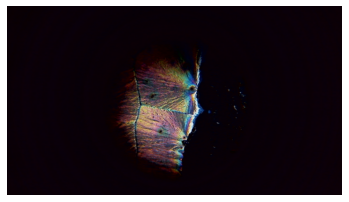

In [38]:
# cap = cv2.VideoCapture('/dev/video4', cv2.CAP_V4L2)
# ret, frame = cap.read()
# cap.release()

import cv2

cap = cv2.VideoCapture('/dev/video4', cv2.CAP_V4L2)
# Request 1920x1080
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

# For many Logitech cams, you also want MJPEG so you can actually get 1080p at a decent framerate:
cap.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter_fourcc(*'MJPG'))
cap.set(cv2.CAP_PROP_FPS, 30)

if not cap.isOpened():
    print("Failed to open camera")
else:
    ret, frame = cap.read()
    if ret:
        print("Captured a 1080p frame:", frame.shape)
    cap.release()


if ret:
    # Convert BGR to RGB for proper display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Failed to capture image")

In [39]:
frame_rgb.size, frame_rgb.shape

(6220800, (1080, 1920, 3))

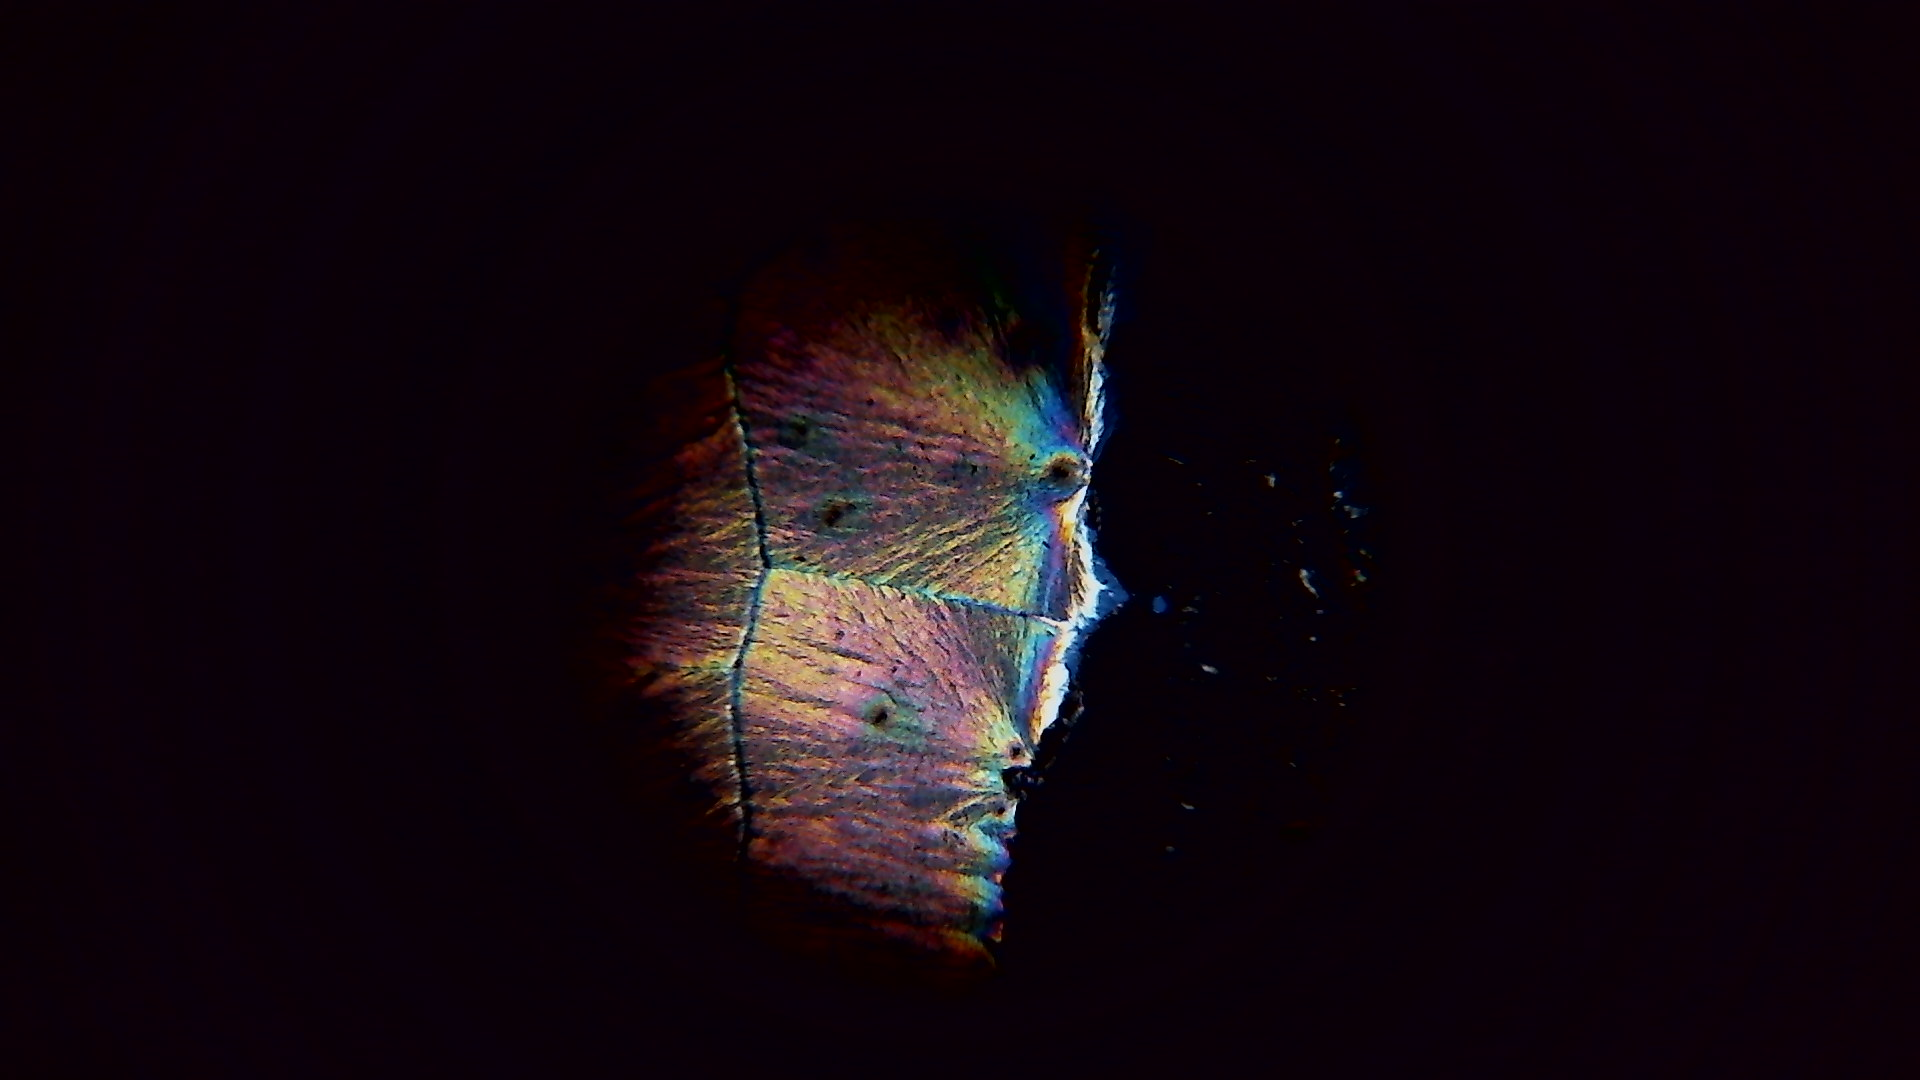

In [40]:
# Show it large
from IPython.display import display, clear_output
import PIL.Image
import io

display(PIL.Image.fromarray(frame_rgb))